In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from viz import lineplot
save_kwargs = dict(dpi=300, bbox_inches="tight", transparent=False)

In [4]:
nm = "CKL"
d = 2

ACC_YLIM = (0.80, 0.835)
ANS_XLIM = (0, 25_000)

In [8]:
df = pd.read_csv("_viz_data.csv")
df["error"] = 1 - df["accuracy"]
arr_priority_tuning = ~df.meta__priority.isnull()
df = df[arr_priority_tuning]
df.head()

,Unnamed: 0,accuracy,nn_diff_median,nn_diff_mean,nn_acc,avg_items_closer_than_NN,nn_diff_p99,nn_diff_p98,nn_diff_p95,nn_diff_p90,...,meta__ident_k,meta__est__module__mu,meta__est__verbose,meta__meta__alg,meta__meta__vary,meta__meta__fname,meta__rate,meta__meta__sampling_seed,meta__priority,error
448,448,0.507147,18.5,24.977778,0.011111,31.911111,77.88,75.44,68.65,61.2,...,0,0.05,100000,ARR,NaN,salmon/io/2021-11-08/ARR-scores=approx.csv,NaN,NaN,approx,0.492853
449,449,0.563969,18.0,20.411111,0.011111,30.544444,60.55,56.88,51.30,45.2,...,1,0.05,100000,ARR,NaN,salmon/io/2021-11-08/ARR-scores=approx.csv,NaN,NaN,approx,0.436031
450,450,0.522615,19.0,24.366667,0.011111,41.455556,77.22,69.20,55.55,51.4,...,20,0.05,100000,ARR,NaN,salmon/io/2021-11-08/ARR-scores=original.csv,NaN,NaN,original,0.477385
451,451,0.530325,14.5,17.366667,0.000000,43.033333,53.09,49.44,48.10,41.0,...,21,0.05,100000,ARR,NaN,salmon/io/2021-11-08/ARR-scores=original.csv,NaN,NaN,original,0.469675
452,452,0.585886,15.5,23.777778,0.022222,33.122222,81.22,81.00,75.10,60.1,...,22,0.05,100000,ARR,NaN,salmon/io/2021-11-08/ARR-scores=original.csv,NaN,NaN,original,0.414114


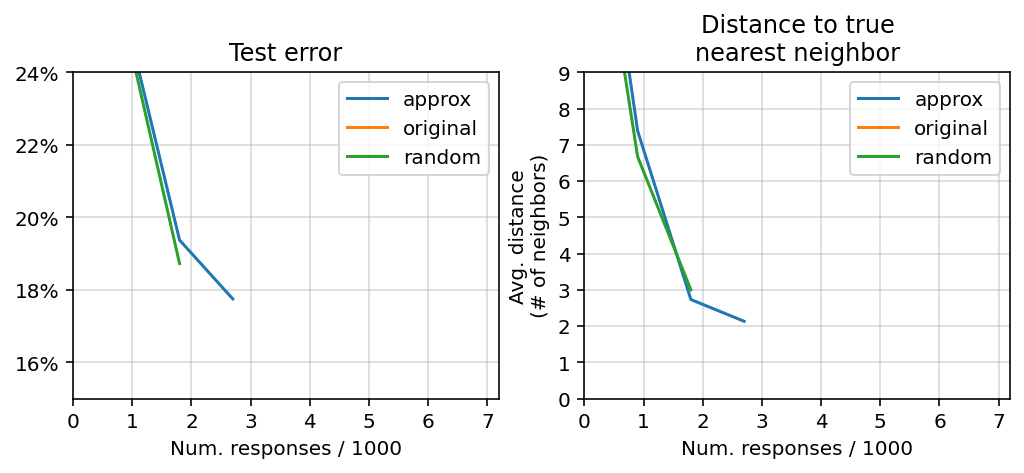

In [9]:
from viz import lineplot
import matplotlib.pyplot as plt

def _fmt(axs):
    ax = axs[0]
    ax.set_ylim(0.15, 0.24)
    ax.set_title("Test error")
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x * 100:0.0f}%"))
    
    ax = axs[1]
    ax.set_ylim(0, 9)
    ax.set_ylabel("Avg. distance\n(# of neighbors)")
    ax.set_title("Distance to true\nnearest neighbor")
    for ax in axs:
        ax.grid(alpha=0.5)
        ax.set_xlim(0, 7200)
#         ax.set_xlim(0, None)
        ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x / 1000)))
        ax.xaxis.set_major_locator(plt.MultipleLocator(1000))
        ax.set_xlabel("Num. responses / 1000")
    return axs

static = dict(
    x="meta__len_X_train",
    hue="meta__priority",
    palette=[f"C{k}" for k in range(3)],
    data=df,
)
w = 3
fig, axs = plt.subplots(ncols=2, figsize=(2 * 1.4 * w, w))
ax = lineplot(y="error", **static, ax=axs[0])

ax = lineplot(y="nn_diff_mean", **static, ax=axs[1])

axs = _fmt(axs)
# axs[0].set_ylim(0, 1)
axs[1].yaxis.set_major_locator(plt.MultipleLocator(1))
fig.savefig("figures/arr-priority.png", **save_kwargs)